#### Generating 'sine' values

In [61]:
import numpy as np
step_size = (20*np.pi/1000)
points = np.arange(1000) #returns evenly space points b/w 0 and 1000
points = step_size*points  #now distance b/w two points is 20*np.pi/1000
dataset = np.sin(points)[:,None] #creates sine values at generated points

print dataset.shape

(1000, 1)


#### Plotting the generated sine values

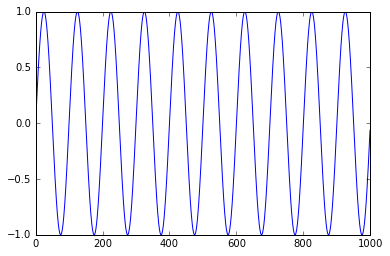

In [62]:
import matplotlib.pyplot as plt
plt.plot(dataset)
plt.show()

#### Function - Generate X and Y for the model

In [63]:
# convert an array of values into a dataset matrix
# look_back looks back previous (look_back - 1) datapoints
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back):
        dataX.append(dataset[i:(i+look_back), 0])
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

#### Normalizing the dateset

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset) #normalize dataset into the range (0, 1)

#### Splitting the dataset into train and test datasets

In [65]:
train_size = int(len(dataset)*0.67)
test_size   = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

print train.shape
print test.shape

(670, 1)
(330, 1)


#### Window of 5 time steps

In [66]:
look_back = 50

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print trainX.shape
print trainY.shape
print testX.shape
print testY.shape

(620, 50)
(620,)
(280, 50)
(280,)


#### Reshaping the trainX and testX into a format that is expected by an LSTM network. i.e. [samples, time steps, features].

In [67]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

print 'trainX shape = ', trainX.shape
print 'testX shape   = ', testX.shape

print trainX[0], '=>' , trainY[0]
print trainX[1], '=>' , trainY[1]

trainX shape =  (620, 50, 1)
testX shape   =  (280, 50, 1)
[[0.5       ]
 [0.53139526]
 [0.56266662]
 [0.59369066]
 [0.62434494]
 [0.6545085 ]
 [0.68406228]
 [0.71288965]
 [0.74087684]
 [0.7679134 ]
 [0.79389263]
 [0.81871199]
 [0.84227355]
 [0.86448431]
 [0.88525662]
 [0.9045085 ]
 [0.92216396]
 [0.93815334]
 [0.95241353]
 [0.96488824]
 [0.97552826]
 [0.98429158]
 [0.99114363]
 [0.99605735]
 [0.99901336]
 [1.        ]
 [0.99901336]
 [0.99605735]
 [0.99114363]
 [0.98429158]
 [0.97552826]
 [0.96488824]
 [0.95241353]
 [0.93815334]
 [0.92216396]
 [0.9045085 ]
 [0.88525662]
 [0.86448431]
 [0.84227355]
 [0.81871199]
 [0.79389263]
 [0.7679134 ]
 [0.74087684]
 [0.71288965]
 [0.68406228]
 [0.6545085 ]
 [0.62434494]
 [0.59369066]
 [0.56266662]
 [0.53139526]] => 0.49999999999999983
[[0.53139526]
 [0.56266662]
 [0.59369066]
 [0.62434494]
 [0.6545085 ]
 [0.68406228]
 [0.71288965]
 [0.74087684]
 [0.7679134 ]
 [0.79389263]
 [0.81871199]
 [0.84227355]
 [0.86448431]
 [0.88525662]
 [0.9045085 ]
 [0.922

#### Building the LSTM model

In [68]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Dropout, MaxPooling1D, Flatten

verbose, epochs, batch_size = 1, 200, 64
n_timesteps, n_features, n_outputs = look_back, 1, 1
model = Sequential()
model.add(Conv1D(filters=512, kernel_size=3, activation='relu', input_shape=(n_timesteps, n_features)))
model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(200, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(n_outputs, activation='linear'))
model.compile(loss='mae', optimizer='adam', metrics=['mae', 'accuracy', 'mse'])
model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, verbose=verbose)

Epoch 1/200
620/620 [==============================] - 7s 12ms/step - loss: 0.3398 - mean_absolute_error: 0.3398 - acc: 0.0177 - mean_squared_error: 0.2360
Epoch 2/200
620/620 [==============================] - 6s 10ms/step - loss: 0.1671 - mean_absolute_error: 0.1671 - acc: 0.0194 - mean_squared_error: 0.0421
Epoch 3/200
620/620 [==============================] - 6s 10ms/step - loss: 0.1358 - mean_absolute_error: 0.1358 - acc: 0.0194 - mean_squared_error: 0.0307
Epoch 4/200
620/620 [==============================] - 6s 10ms/step - loss: 0.0583 - mean_absolute_error: 0.0583 - acc: 0.0194 - mean_squared_error: 0.0059
Epoch 5/200
620/620 [==============================] - 6s 10ms/step - loss: 0.0379 - mean_absolute_error: 0.0379 - acc: 0.0194 - mean_squared_error: 0.0024
Epoch 6/200
620/620 [==============================] - 11s 17ms/step - loss: 0.0353 - mean_absolute_error: 0.0353 - acc: 0.0194 - mean_squared_error: 0.0020
Epoch 7/200
620/620 [==============================] - 8s 13ms/

620/620 [==============================] - 7s 12ms/step - loss: 0.0155 - mean_absolute_error: 0.0155 - acc: 0.0194 - mean_squared_error: 4.0872e-04
Epoch 53/200
620/620 [==============================] - 7s 12ms/step - loss: 0.0195 - mean_absolute_error: 0.0195 - acc: 0.0194 - mean_squared_error: 6.4892e-04
Epoch 54/200
620/620 [==============================] - 8s 14ms/step - loss: 0.0257 - mean_absolute_error: 0.0257 - acc: 0.0194 - mean_squared_error: 0.0013
Epoch 55/200
620/620 [==============================] - 7s 11ms/step - loss: 0.0204 - mean_absolute_error: 0.0204 - acc: 0.0194 - mean_squared_error: 8.1275e-04
Epoch 56/200
620/620 [==============================] - 7s 11ms/step - loss: 0.0137 - mean_absolute_error: 0.0137 - acc: 0.0194 - mean_squared_error: 3.2460e-04
Epoch 57/200
620/620 [==============================] - 7s 11ms/step - loss: 0.0118 - mean_absolute_error: 0.0118 - acc: 0.0194 - mean_squared_error: 2.5551e-04
Epoch 58/200
620/620 [=============================

Epoch 103/200
620/620 [==============================] - 7s 12ms/step - loss: 0.0083 - mean_absolute_error: 0.0083 - acc: 0.0194 - mean_squared_error: 1.1669e-04
Epoch 104/200
620/620 [==============================] - 7s 11ms/step - loss: 0.0098 - mean_absolute_error: 0.0098 - acc: 0.0194 - mean_squared_error: 1.7985e-04
Epoch 105/200
620/620 [==============================] - 7s 11ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - acc: 0.0194 - mean_squared_error: 2.3152e-04
Epoch 106/200
620/620 [==============================] - 8s 12ms/step - loss: 0.0109 - mean_absolute_error: 0.0109 - acc: 0.0194 - mean_squared_error: 2.2447e-04
Epoch 107/200
620/620 [==============================] - 7s 12ms/step - loss: 0.0112 - mean_absolute_error: 0.0112 - acc: 0.0194 - mean_squared_error: 2.3495e-04
Epoch 108/200
620/620 [==============================] - 7s 11ms/step - loss: 0.0136 - mean_absolute_error: 0.0136 - acc: 0.0194 - mean_squared_error: 3.2258e-04
Epoch 109/200
620/620 [=====

620/620 [==============================] - 7s 11ms/step - loss: 0.0115 - mean_absolute_error: 0.0115 - acc: 0.0194 - mean_squared_error: 2.4545e-04
Epoch 154/200
620/620 [==============================] - 8s 12ms/step - loss: 0.0125 - mean_absolute_error: 0.0125 - acc: 0.0194 - mean_squared_error: 2.5186e-04
Epoch 155/200
620/620 [==============================] - 7s 12ms/step - loss: 0.0124 - mean_absolute_error: 0.0124 - acc: 0.0194 - mean_squared_error: 2.7269e-04
Epoch 156/200
620/620 [==============================] - 7s 11ms/step - loss: 0.0169 - mean_absolute_error: 0.0169 - acc: 0.0194 - mean_squared_error: 5.2664e-04
Epoch 157/200
620/620 [==============================] - 7s 11ms/step - loss: 0.0157 - mean_absolute_error: 0.0157 - acc: 0.0194 - mean_squared_error: 4.3085e-04
Epoch 158/200
620/620 [==============================] - 7s 12ms/step - loss: 0.0154 - mean_absolute_error: 0.0154 - acc: 0.0194 - mean_squared_error: 3.8649e-04
Epoch 159/200
620/620 [===================

In [69]:
trainScore = model.evaluate(trainX, trainY, batch_size=1, verbose=1)
print('Train Score: ', trainScore)
testScore = model.evaluate(testX, testY, batch_size=1, verbose=1)
print('Test Score: ', testScore)

620/620 [==============================] - 11s 18ms/step
('Train Score: ', [0.11745995166561296, 0.11745995166561296, 0.01935483870967742, 0.02182881628201035])
280/280 [==============================] - 4s 16ms/step
('Test Score: ', [0.11549268219886082, 0.11549268219886082, 0.02142857142857143, 0.02149501698874831])


#### Predicting Future Values of Sine Function

In [70]:
look_ahead = 250
trainPredict = [np.vstack([trainX[-1][1:], trainY[-1]])]
predictions = np.zeros((look_ahead,1))
for i in range(look_ahead):
    prediction = model.predict(np.array([trainPredict[-1]]), batch_size=1)
    predictions[i] = prediction
    trainPredict.append(np.vstack([trainPredict[-1][1:],prediction]))

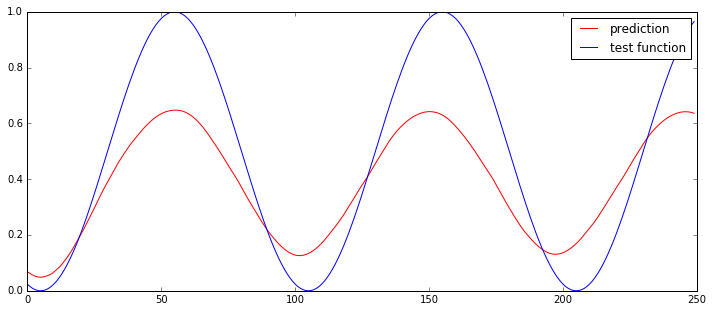

In [71]:
plt.figure(figsize=(12,5))
# plt.plot(np.arange(len(trainX)),np.squeeze(trainX))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(trainPredict)[:,None][1:]))
# plt.plot(np.arange(200),scaler.inverse_transform(np.squeeze(testY)[:,None][:200]),'r')
plt.plot(np.arange(look_ahead),predictions,'r',label="prediction")
plt.plot(np.arange(look_ahead),dataset[train_size:(train_size+look_ahead)],label="test function")
plt.legend()
plt.show()